<a href="https://colab.research.google.com/github/justinpatel/cats_vs_dogs-tensorflow/blob/master/catvsdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
import tensorflow_datasets as tfd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image_dataset_from_directory


In [7]:
(train, validation, test), metadata = tfd.load(
    'cats_vs_dogs',
    split=["train[:80%]","train[80%:90%]","train[90%:]"],
    as_supervised = True,
    with_info = True,
)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete981WZS/cats_vs_dogs-train.tfrecord



Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


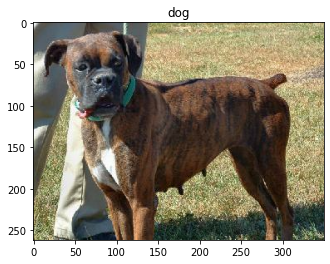

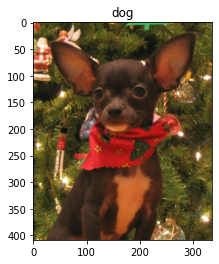

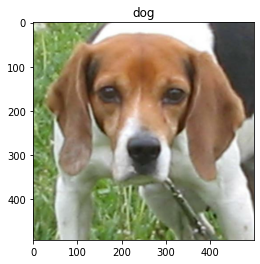

In [8]:
get_label_name = metadata.features['label'].int2str

n = 3
for image, label in train.take(n):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [9]:
IMAGE_SIZE = 160

def format_example(image, label):
  img = tf.cast(image, tf.float32)
  img = (img/127.5) - 1
  img = tf.image.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
  return img, label

In [10]:
train = train.map(format_example)
validation  = validation.map(format_example)
test  = test.map(format_example)

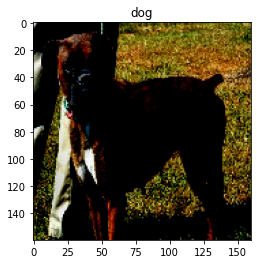

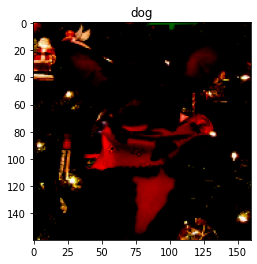

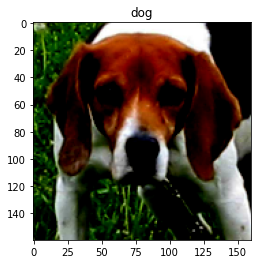

In [6]:
n = 3
for image, label in train.take(n):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [38]:
train_dataset = train.shuffle(100).batch(64)
validation_dataset = validation.shuffle(100).batch(64)
test_dataset = test.batch(64)

In [44]:
test_dataset

<DatasetV1Adapter shapes: ((None, 160, 160, 3), (None,)), types: (tf.float32, tf.int64)>

In [41]:
for image,label in train_dataset.take(2):
  print(image.shape)

(64, 160, 160, 3)
(64, 160, 160, 3)


In [42]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMAGE_SIZE,IMAGE_SIZE, 3),
    include_top=False,
    weights='imagenet'    
  )

base_model.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [45]:
model = tf.keras.Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(1))

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [47]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [48]:
history = model.fit(train_dataset, epochs=3, validation_data=validation_dataset)

acc = history.history['accuracy']
print(acc)

Epoch 1/3
291/291 [==============================] - 55s 189ms/step - loss: 0.3284 - accuracy: 0.8418 - val_loss: 0.1274 - val_accuracy: 0.9596
Epoch 2/3
291/291 [==============================] - 53s 182ms/step - loss: 0.0971 - accuracy: 0.9678 - val_loss: 0.0750 - val_accuracy: 0.9742
Epoch 3/3
291/291 [==============================] - 53s 181ms/step - loss: 0.0697 - accuracy: 0.9760 - val_loss: 0.0619 - val_accuracy: 0.9789
[0.841751754283905, 0.9678130149841309, 0.97603440284729]


In [ ]:
loss, acc = model.evaluate(test)

In [1]:
model.save("catvsdog.h5")

NameError: ignored

In [13]:

import tensorflow as tf

new_model = tf.keras.models.load_model('/catvsdog.h5')

In [4]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [14]:
prediction = new_model.predict_classes(train_dataset)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


dog


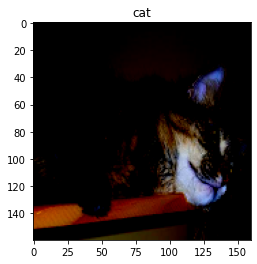

In [33]:
n = 3
i = 0

for image, label in train.take(n+1):
  if i== n: 
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))
    break
  i+=1

if prediction[n] == 1:
  print("dog")
else:
  print("cat")

In [36]:
prediction[:10]

array([[1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0]], dtype=int32)

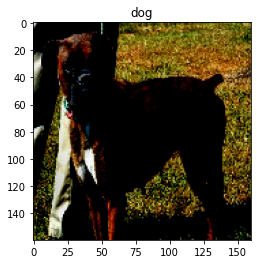

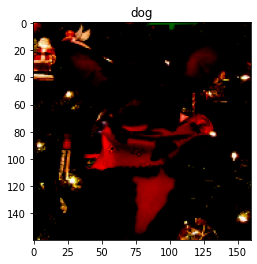

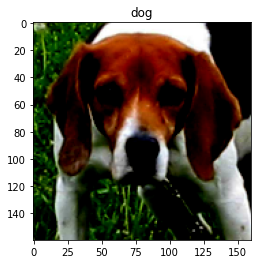

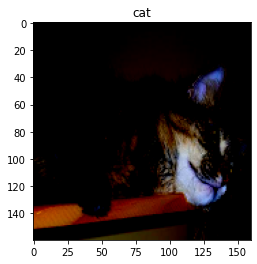

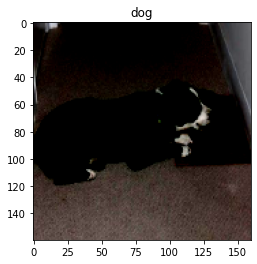

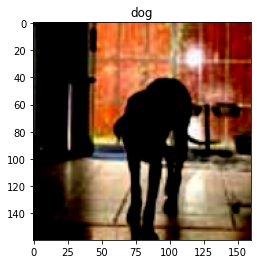

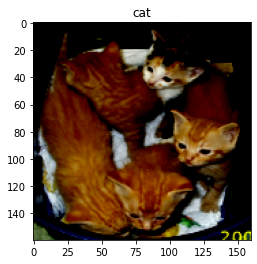

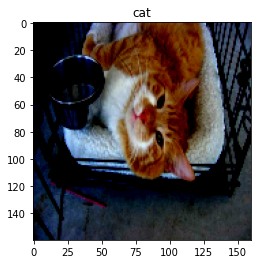

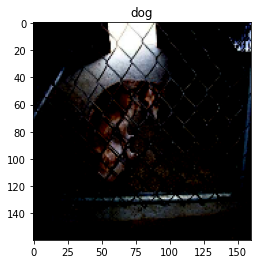

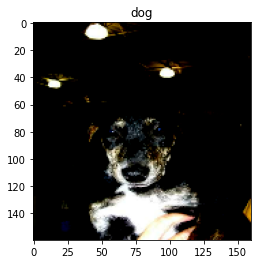

In [37]:
n = 10
for image, label in train.take(n):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))